In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inline

In [3]:
titles = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
cars = pd.read_csv("imports-85.data", names=titles)

In [4]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars = cars.replace("?", np.nan)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

Columns which must be converted to float: ["bore", "stroke"].
To int: ["horsepower", "peak_rpm", "price", "normalized_losses"].
Convert string to int: ["num_doors", "num_cylinders"].

In [7]:
meanNormLosses = cars[~cars.normalized_losses.isnull()].normalized_losses.astype(int).mean()
cars.normalized_losses = cars.normalized_losses.fillna(meanNormLosses)

In [8]:
cars.normalized_losses = cars.normalized_losses.astype(int)

In [9]:
cars.num_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [10]:
cars.num_doors.unique()

array(['two', 'four', nan], dtype=object)

In [11]:
dictionary = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve": 12}
cars.num_doors = cars.num_doors.map(dictionary)
cars.num_cylinders = cars.num_cylinders.map(dictionary)

In [12]:
cars = cars.drop(cars[cars.horsepower.isnull()].index, axis=0)
cars = cars.drop(cars[cars.num_doors.isnull()].index, axis=0)
cars = cars.drop(cars[cars.price.isnull()].index, axis=0)
cars = cars.drop(cars[cars.bore.isnull()].index, axis=0)

In [13]:
cars.peak_rpm = cars.peak_rpm.astype(int)
cars.price = cars.price.astype(int)
cars.horsepower = cars.horsepower.astype(int)
cars.num_doors = cars.num_doors.astype(int)
cars.num_cylinders = cars.num_cylinders.astype(int)
cars.bore = cars.bore.astype(float)
cars.stroke = cars.stroke.astype(float)

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
symboling            193 non-null int64
normalized_losses    193 non-null int64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_doors            193 non-null int64
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_cylinders        193 non-null int64
engine_size          193 non-null int64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null

In [15]:
dropColumns = ["make", "fuel_type", "aspiration", "body_style", "drive_wheels", "engine_location", "engine_type", "fuel_system"]
cars = cars.drop(dropColumns, axis=1)

In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 18 columns):
symboling            193 non-null int64
normalized_losses    193 non-null int64
num_doors            193 non-null int64
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
num_cylinders        193 non-null int64
engine_size          193 non-null int64
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null int64
peak_rpm             193 non-null int64
city_mpg             193 non-null int64
highway_mpg          193 non-null int64
price                193 non-null int64
dtypes: float64(7), int64(11)
memory usage: 28.6 KB


In [17]:
price = cars.price
cars = (cars - cars.min()) / (cars.max() - cars.min())
cars["price"] = price

In [18]:
cars.head()

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495
1,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500
2,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.333333,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.111111,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.222222,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450


Creating KNeighborsRegressor model and calculating root mean squared error

In [97]:
def knn_train_test(df, trainColumn, targetColumn, neighbours):
    rmses = {}
    for neighbour in neighbours:
        knn = KNeighborsRegressor(n_neighbors=neighbour)
        kf = KFold(n_splits=2)
        mses = cross_val_score(knn, df[trainColumn], df[targetColumn], scoring="neg_mean_squared_error", cv=kf)
        rmse = np.sqrt(np.absolute(mses)).mean()
        rmses[neighbour] = rmse
    return rmses

Training KNeighborsRegressor model

In [98]:
results = {}
trainColumns = cars.drop("price", axis=1)
neighbours = [1, 3, 5, 7, 9]

for column in trainColumns:
    rmse = knn_train_test(cars, [column], "price", neighbours)
    results[column] = rmse

In [99]:
results.keys()

dict_keys(['num_doors', 'symboling', 'peak_rpm', 'engine_size', 'num_cylinders', 'curb_weight', 'bore', 'horsepower', 'compression_ratio', 'highway_mpg', 'stroke', 'city_mpg', 'wheel_base', 'height', 'width', 'normalized_losses', 'length'])

In [22]:
df = pd.DataFrame(results)
df.columns

Index(['bore', 'city_mpg', 'compression_ratio', 'curb_weight', 'engine_size',
       'height', 'highway_mpg', 'horsepower', 'length', 'normalized_losses',
       'num_cylinders', 'num_doors', 'peak_rpm', 'stroke', 'symboling',
       'wheel_base', 'width'],
      dtype='object')

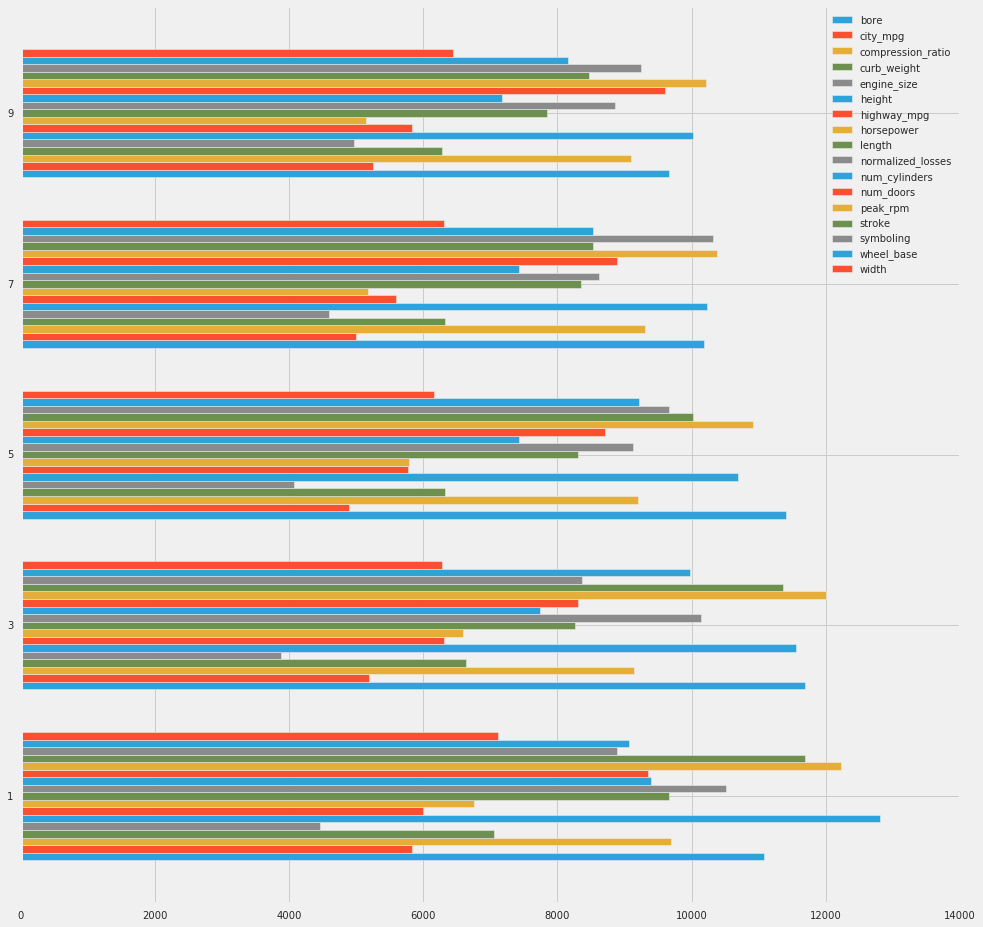

In [100]:
df.plot(kind="barh", figsize=(15, 15), width=0.75)

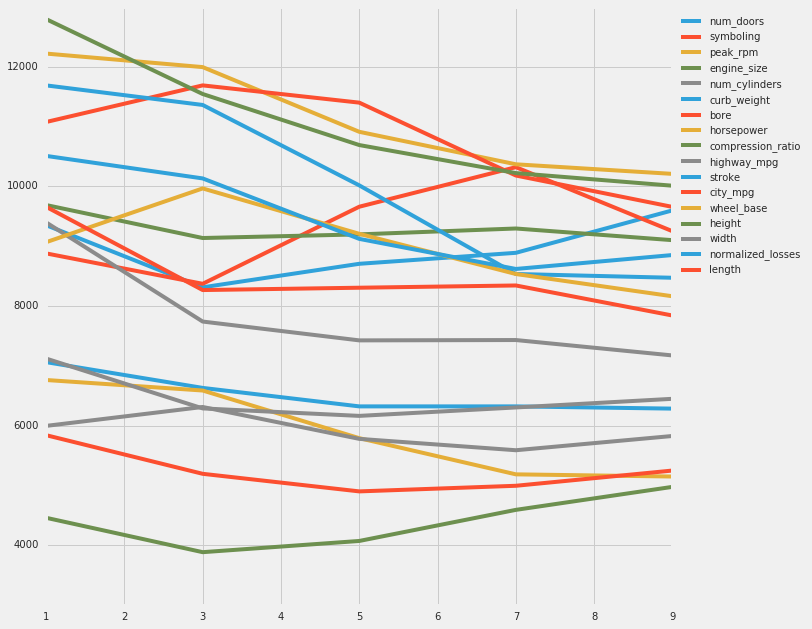

In [101]:
fig = plt.figure(figsize=(10, 10))
plt.style.use("fivethirtyeight") 

for i in range(len(results.keys())):
    nestedValues = []
    keyLabel = list(results.keys())[i]
    innerDict = results[keyLabel]
    
    for neighbour in neighbours:
        nestedValues.append(innerDict[neighbour])
        
    plt.plot(neighbours, nestedValues, label=keyLabel)
    
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Choose best columns to train model

In [102]:
for key in results.keys():
    print(key, np.mean(list(results[key].values())))

num_doors 8972.392551418654
symboling 9297.553902207039
peak_rpm 11143.715141925264
engine_size 4393.474754617926
num_cylinders 7833.367180842212
curb_weight 6522.705655742216
bore 10802.960991195974
horsepower 5893.023114673604
compression_ratio 9284.883201894401
highway_mpg 5898.447801595244
stroke 10016.519890547568
city_mpg 5233.331474494633
wheel_base 8988.150964023414
height 11055.732790024404
width 6463.491784000005
normalized_losses 9448.531335849217
length 8483.411631528608


Selecting 3 best models from 5 columns

In [105]:
bestColumns = ["engine_size", "city_mpg", "horsepower", "highway_mpg", "width"]
defaultNeighboursValue = [5]
rmseAll = []

for i in range(len(bestColumns)):
    rmse = knn_train_test(cars, bestColumns[:i+1], "price", defaultNeighboursValue)
    rmseAll.append(rmse)
rmseAll

[{5: 4068.2964223771073},
 {5: 4399.293371840863},
 {5: 4845.560060735925},
 {5: 4343.432004216595},
 {5: 5237.706848156432}]

Top 3 models are: 1: ["engine_size"],
                  2: ["engine_size", "city_mpg", "horsepower", "highway_mpg"], 
                  3: ["engine_size", "city_mpg"]

In [116]:
bestColumn = ["engine_size", "city_mpg", "horsepower", "highway_mpg"]
chooseBest = [1, 4, 2]

columnsRmses = {}
for col in chooseBest:
    rmse = knn_train_test(cars, bestColumn[:col], "price", np.arange(1, 26))
    columnsRmses[col] = rmse

Plot below shows us that the most optimal k values are 3-5

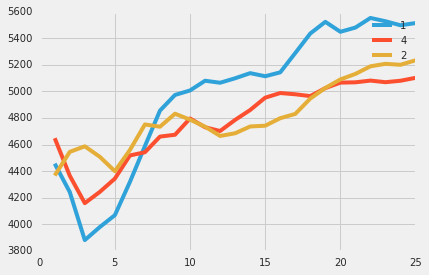

In [124]:
for colsNum in chooseBest:
    plt.plot(list(columnsRmses[colsNum].keys()), list(columnsRmses[colsNum].values()), label=colsNum)
plt.legend()
plt.show()